In [359]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
# Stop warnings
import warnings as w
w.simplefilter(action='ignore',category=FutureWarning)

# **CGT Dataset Exploration**
---

In [4]:
cgt_DF = pd.read_csv('cgt/consolidated.csv',delimiter=';')
cgt_DF

,dataset,id,property,property_holds,chain,addr,contractname,fp_sol,fp_sol2,fp_bytecode,fp_runtime,swc,dasp
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Unchecked External Call,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,104.0,4.0
1,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Dos Under external influence,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,113.0,5.0
2,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,strict balance equality,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,132.0,NaN
3,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Unmatched type assignment,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,NaN,NaN
4,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Transaction state Dependency,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,115.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20450,eThor,0xfe9c69945687539fabbf531133838d9cce522a76,reentrancy,f,main,0xfe9c69945687539fabbf531133838d9cce522a76,NaN,NaN,NaN,6e7c7db087b6df28af12f3911a4dfa1f,90f72e7120351a8752a8da30397aa35e,107.0,1.0
20451,eThor,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,reentrancy,t,main,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,Etheramid2,ab0e2ea9e14512594f714bc485a94361,ab0e2ea9e14512594f714bc485a94361,c99576c2b5ff3122d1100b204c1eb340,af2737edbd91a12f977d2f62512ef1ad,107.0,1.0
20452,eThor,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,reentrancy,f,main,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,ValentineRegistry,d2c9f4ddb6dabb91742838a31da15421,61fa6ad7678fa97cd094f14068ac4086,ff4afc0652f28856516ae18bcc004dc1,5482fbfa676268aadadd59d02aa94a2a,107.0,1.0
20453,eThor,0xff821e51150dea3ca4d201d0df4e568dc9e03239,reentrancy,f,main,0xff821e51150dea3ca4d201d0df4e568dc9e03239,NaN,NaN,NaN,ca3d8fbb2ea49f93810b316a855cc450,bf5269b022133280187cc3100be46985,107.0,1.0


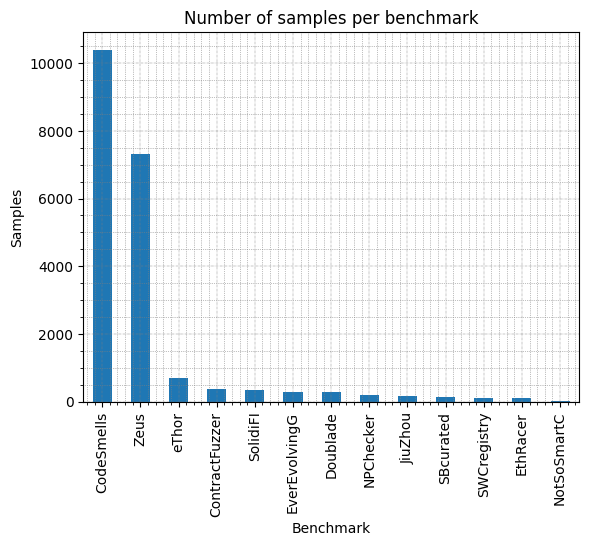

In [47]:
ax = cgt_DF['dataset'].value_counts().plot(kind='bar',title="Number of samples per benchmark")
ax.set_xlabel("Benchmark")
ax.set_ylabel("Samples")
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5");
plt.minorticks_on()
plt.show()

In [24]:
print('%d publicly available benchmarks are included in this dataset. \n The benchmarks are: \n %s' %(len(cgt_DF['dataset'].unique()), cgt_DF['dataset'].unique().tolist()))

13 publicly available benchmarks are included in this dataset. 
 The benchmarks are: 
 ['CodeSmells', 'SolidiFI', 'ContractFuzzer', 'SBcurated', 'JiuZhou', 'Doublade', 'SWCregistry', 'EthRacer', 'EverEvolvingG', 'NPChecker', 'NotSoSmartC', 'Zeus', 'eThor']


In [23]:
print('%d properties in the CGT data, which are:\n %s' %(len(cgt_DF['property'].unique()), cgt_DF['property'].unique().tolist()))

160 properties in the CGT data, which are:
 ['Unchecked External Call', 'Dos Under external influence', 'strict balance equality', 'Unmatched type assignment', 'Transaction state Dependency', 'Reentrancy', 'Hard Code Address', 'Block Info Dependency', 'Nest Call', 'Deprecated APIs', 'Compiler Version not fixed', 'Misleading Data Location', 'Unused statement', 'Missing Return statement', 'Missing Interrupter', 'Missing Reminder', 'Greedy Contract', 'High Gas Consumption Function Type', 'Overflow-Underflow', 'High Gas Consumption Data Type', 'freezing_ether', 'unchecked_low_level_calls', 'byte[]', 'Unmatched ERC-20 standard', 'numberdependency', 'reentrancy', 'Right-To-Left-Overridecontrolcharacter (U+202E)', 'Timestamp-Dependency', 'Unchecked-Send', 'Locked money', 'lowlevelcall_result', 'delegatecall_dangerous', 'Write the wrong constructor name', 'unexpectedrevert_result', 'Re-entrancy', 'Implicit visibility level', 'Complex fallback function', 'Integer signedness', 'Unhandled-Excepti

In [25]:
print('%d SWC codes in the CGT data, which are:\n %s' %(len(cgt_DF['swc'].unique()), cgt_DF['swc'].unique().tolist()))

39 SWC codes in the CGT data, which are:
 [104.0, 113.0, 132.0, nan, 115.0, 107.0, 120.0, 128.0, 103.0, 135.0, 997.0, 101.0, 130.0, 116.0, 105.0, 112.0, 118.0, 108.0, 999.0, 127.0, 124.0, 110.0, 123.0, 125.0, 111.0, 136.0, 114.0, 117.0, 996.0, 119.0, 995.0, 106.0, 133.0, 134.0, 109.0, 129.0, 131.0, 102.0, 100.0]


In [26]:
print('%d DASP ranks in the CGT data, which are:\n %s' %(len(cgt_DF['dasp'].unique()), cgt_DF['dasp'].unique().tolist()))

10 DASP ranks in the CGT data, which are:
 [4.0, 5.0, nan, 2.0, 1.0, 6.0, 3.0, 8.0, 7.0, 9.0]


# **Convert CGT DS into Multi-Label DS**
---

In [101]:
#Remove label columns
cgt_MultiDS = cgt_DF.drop(['property','swc','dasp'],axis=1)
# Remove duplicate ids
cgt_MultiDS = cgt_MultiDS.drop_duplicates('id',keep='first',ignore_index=True)
cgt_MultiDS

,dataset,id,property_holds,chain,addr,contractname,fp_sol,fp_sol2,fp_bytecode,fp_runtime
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd
1,SolidiFI,Overflow-Underflow-3,t,NaN,NaN,CareerOnToken,e01ab8b006611d8612a81724edcfdc02,cd722241b984e03c3b3e7d44e5d89fab,NaN,NaN
2,CodeSmells,0x00674045bb7c17f0aa1cde34780d6c51af548728,f,main,0x00674045bb7c17f0aa1cde34780d6c51af548728,MultiSigWalletWithDailyLimit,a6c230ff97ae1906c6f9c50c18250437,490a68bcbbf7b3570c5a36970549c130,6b9bb083e105127506d422e220a01bb2,cd9e73cc1e8213426c31824ae1ccb14d
3,ContractFuzzer,BAIC-freezing_ether,t,NaN,NaN,NaN,bdefad9ebc67e44422c1a6aa51f35735,7402f4e40555aa2642a29d8020e3fa95,NaN,7179009405be91de8b6379179e62cc0c
4,SolidiFI,Overflow-Underflow-30,t,NaN,NaN,SKYBITToken,acb72f1f3b2898b62d6d841f999e5c77,60946c853b87744818818b7d1104bc14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4101,eThor,0xfe9c69945687539fabbf531133838d9cce522a76,f,main,0xfe9c69945687539fabbf531133838d9cce522a76,NaN,NaN,NaN,6e7c7db087b6df28af12f3911a4dfa1f,90f72e7120351a8752a8da30397aa35e
4102,eThor,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,t,main,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,Etheramid2,ab0e2ea9e14512594f714bc485a94361,ab0e2ea9e14512594f714bc485a94361,c99576c2b5ff3122d1100b204c1eb340,af2737edbd91a12f977d2f62512ef1ad
4103,eThor,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,f,main,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,ValentineRegistry,d2c9f4ddb6dabb91742838a31da15421,61fa6ad7678fa97cd094f14068ac4086,ff4afc0652f28856516ae18bcc004dc1,5482fbfa676268aadadd59d02aa94a2a
4104,eThor,0xff821e51150dea3ca4d201d0df4e568dc9e03239,f,main,0xff821e51150dea3ca4d201d0df4e568dc9e03239,NaN,NaN,NaN,ca3d8fbb2ea49f93810b316a855cc450,bf5269b022133280187cc3100be46985


## **Two mult-label columns: SWC and DASP**
---

In [218]:
#Add two mult-label columns: SWC and DASP
cgt_MultiDS['SWC']=''
cgt_MultiDS['DASP']= ''

for index, row in cgt_MultiDS.iterrows():
    #extract rows for a specific contract (id)
    subDF = cgt_DF[cgt_DF['id'] == row['id']]
    #Remove None values
    SWC= subDF['swc'].unique().tolist()
    SWC = [int(x) for x in SWC if not math.isnan(x)]
    DASP = subDF['dasp'].unique().tolist()
    DASP = [int(x) for x in DASP if not math.isnan(x)]
    #Set values of label columns
    cgt_MultiDS.at[index,'SWC'] = sorted(SWC)
    cgt_MultiDS.at[index,'DASP'] = sorted(DASP)

cgt_MultiDS.to_csv('./EDA_Outcomes/mult-label_CGT_DS.csv',index=False)

In [219]:
cgt_MultiDS

,dataset,id,property_holds,chain,addr,contractname,fp_sol,fp_sol2,fp_bytecode,fp_runtime,SWC,DASP
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,"[103, 104, 107, 113, 115, 120, 128, 132, 135, ...","[1, 2, 4, 5, 6]"
1,SolidiFI,Overflow-Underflow-3,t,NaN,NaN,CareerOnToken,e01ab8b006611d8612a81724edcfdc02,cd722241b984e03c3b3e7d44e5d89fab,NaN,NaN,[101],[3]
2,CodeSmells,0x00674045bb7c17f0aa1cde34780d6c51af548728,f,main,0x00674045bb7c17f0aa1cde34780d6c51af548728,MultiSigWalletWithDailyLimit,a6c230ff97ae1906c6f9c50c18250437,490a68bcbbf7b3570c5a36970549c130,6b9bb083e105127506d422e220a01bb2,cd9e73cc1e8213426c31824ae1ccb14d,"[103, 104, 107, 113, 115, 120, 128, 132, 135, ...","[1, 2, 4, 5, 6]"
3,ContractFuzzer,BAIC-freezing_ether,t,NaN,NaN,NaN,bdefad9ebc67e44422c1a6aa51f35735,7402f4e40555aa2642a29d8020e3fa95,NaN,7179009405be91de8b6379179e62cc0c,[997],[]
4,SolidiFI,Overflow-Underflow-30,t,NaN,NaN,SKYBITToken,acb72f1f3b2898b62d6d841f999e5c77,60946c853b87744818818b7d1104bc14,NaN,NaN,[101],[3]
...,...,...,...,...,...,...,...,...,...,...,...,...
4101,eThor,0xfe9c69945687539fabbf531133838d9cce522a76,f,main,0xfe9c69945687539fabbf531133838d9cce522a76,NaN,NaN,NaN,6e7c7db087b6df28af12f3911a4dfa1f,90f72e7120351a8752a8da30397aa35e,[107],[1]
4102,eThor,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,t,main,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,Etheramid2,ab0e2ea9e14512594f714bc485a94361,ab0e2ea9e14512594f714bc485a94361,c99576c2b5ff3122d1100b204c1eb340,af2737edbd91a12f977d2f62512ef1ad,[107],[1]
4103,eThor,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,f,main,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,ValentineRegistry,d2c9f4ddb6dabb91742838a31da15421,61fa6ad7678fa97cd094f14068ac4086,ff4afc0652f28856516ae18bcc004dc1,5482fbfa676268aadadd59d02aa94a2a,[107],[1]
4104,eThor,0xff821e51150dea3ca4d201d0df4e568dc9e03239,f,main,0xff821e51150dea3ca4d201d0df4e568dc9e03239,NaN,NaN,NaN,ca3d8fbb2ea49f93810b316a855cc450,bf5269b022133280187cc3100be46985,[107],[1]


## **SWC Labeled Data**
---

In [220]:
cgt_MultiDS_SWC = pd.DataFrame(columns=['id','100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '123', '124', '125', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '995', '996', '997', '999'])

for index, row in cgt_MultiDS.iterrows():
    cgt_MultiDS_SWC.at[index,'id'] = row['id']
    for code in row['SWC']:
        cgt_MultiDS_SWC.at[index,str(code)] = 1
cgt_MultiDS_SWC.fillna(0, inplace=True)
cgt_MultiDS_SWC.to_csv('./EDA_Outcomes/cgt_MultiDS_SWC.csv',index=False)

In [221]:
cgt_MultiDS_SWC

,id,100,101,102,103,104,105,106,107,108,...,131,132,133,134,135,136,995,996,997,999
0,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,Overflow-Underflow-3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0x00674045bb7c17f0aa1cde34780d6c51af548728,0,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,BAIC-freezing_ether,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Overflow-Underflow-30,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,0xfe9c69945687539fabbf531133838d9cce522a76,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4102,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4103,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4104,0xff821e51150dea3ca4d201d0df4e568dc9e03239,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## **DASP Labeled Data**
---

In [222]:
cgt_MultiDS_DASP = pd.DataFrame(columns=['id','1','2','3','4','5','6','7','8','9'])

for index, row in cgt_MultiDS.iterrows():
    cgt_MultiDS_DASP.at[index,'id'] = row['id']
    for code in row['DASP']:
        cgt_MultiDS_DASP.at[index,str(code)] = 1
cgt_MultiDS_DASP.fillna(0, inplace=True)

cgt_MultiDS_DASP.to_csv('./EDA_Outcomes/cgt_MultiDS_DASP.csv',index=False)

In [223]:
cgt_MultiDS_DASP

,id,1,2,3,4,5,6,7,8,9
0,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,1,1,0,1,1,1,0,0,0
1,Overflow-Underflow-3,0,0,1,0,0,0,0,0,0
2,0x00674045bb7c17f0aa1cde34780d6c51af548728,1,1,0,1,1,1,0,0,0
3,BAIC-freezing_ether,0,0,0,0,0,0,0,0,0
4,Overflow-Underflow-30,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4101,0xfe9c69945687539fabbf531133838d9cce522a76,1,0,0,0,0,0,0,0,0
4102,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,1,0,0,0,0,0,0,0,0
4103,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,1,0,0,0,0,0,0,0,0
4104,0xff821e51150dea3ca4d201d0df4e568dc9e03239,1,0,0,0,0,0,0,0,0


# **Data Visualization**
---

## **Actual Number of Samples**
---

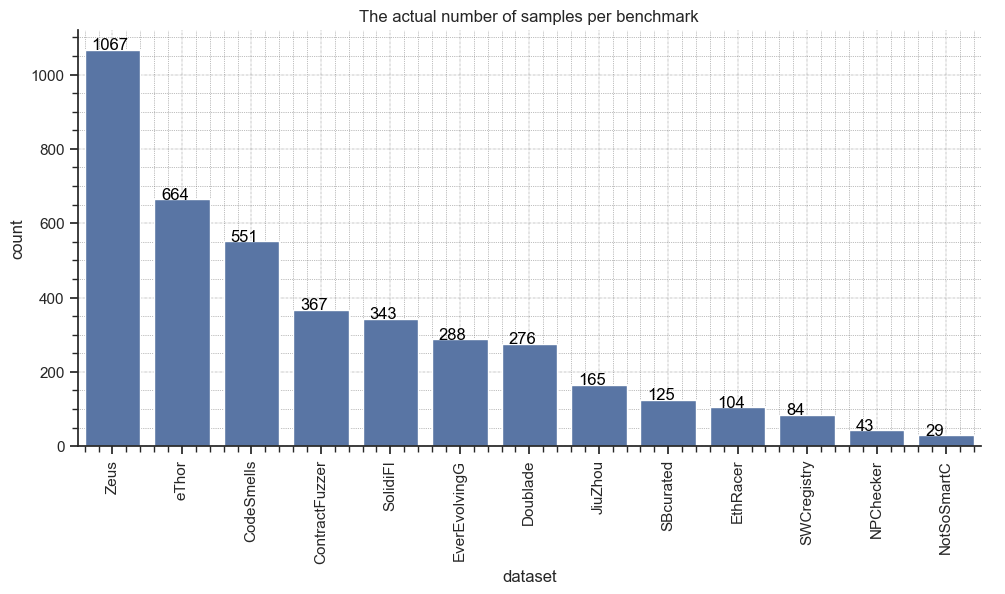

In [138]:
sns.set(style='ticks')
#create grouped bar chart

g=sns.catplot(x='dataset', y='count', data=pd.DataFrame(data=cgt_MultiDS['dataset'].value_counts()), kind='bar', height=5, aspect=2)

ax.set_xlabel("Benchmark")
ax.set_ylabel("Samples")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black',  size='medium')
    
plt.title('The actual number of samples per benchmark', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")
   
plt.xticks(rotation = 90)
plt.minorticks_on()

## **SWC Labels Frequency**
---

In [190]:
SWC_Labels_Statistic= pd.DataFrame(columns=['SWC Code','Frequency'])
codes= cgt_MultiDS_SWC.columns.tolist()
codes.pop(0)

for index in range(0, len(codes)):
    SWC_Labels_Statistic.at[index,'SWC Code'] = codes[index]
    SWC_Labels_Statistic.at[index,'Frequency'] = sum(cgt_MultiDS_SWC[codes[index]])
SWC_Labels_Statistic

,SWC Code,Frequency
0,100,2
1,101,1117
2,102,1
3,103,559
4,104,1827
5,105,62
6,106,9
7,107,2393
8,108,4
9,109,8


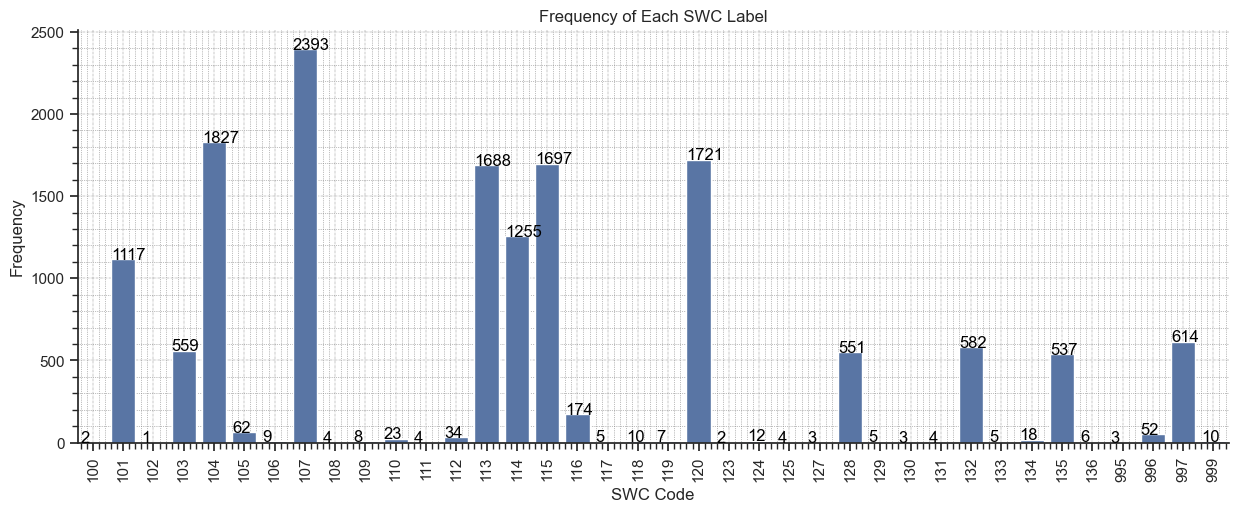

In [217]:
sns.set(style='ticks')
#create grouped bar chart

g=sns.catplot(x='SWC Code', y='Frequency', data=pd.DataFrame(data=SWC_Labels_Statistic), kind='bar', height=5, aspect=2.5)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black',  size='medium')
    
plt.title('Frequency of Each SWC Label', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")
   
plt.xticks(rotation = 90)
plt.minorticks_on()

## **DASP Labels Frequency**
---

In [213]:
DASP_Labels_Statistic= pd.DataFrame(columns=['DASP Rank','Frequency'])
codes= cgt_MultiDS_DASP.columns.tolist()
codes.pop(0)
DASP_Labels = ['Reentrancy','Access Control','Arithmetic','Unchecked Return Values','DoS','Bad Randomness','Front-Running','Time manipulation','Short Address Attack']

for index in range(0, len(codes)):
    DASP_Labels_Statistic.at[index,'DASP Rank'] = DASP_Labels[index]
    DASP_Labels_Statistic.at[index,'Frequency'] = sum(cgt_MultiDS_DASP[codes[index]])
DASP_Labels_Statistic

,DASP Rank,Frequency
0,Reentrancy,2393
1,Access Control,1826
2,Arithmetic,1127
3,Unchecked Return Values,1827
4,DoS,1723
5,Bad Randomness,1721
6,Front-Running,1255
7,Time manipulation,174
8,Short Address Attack,3


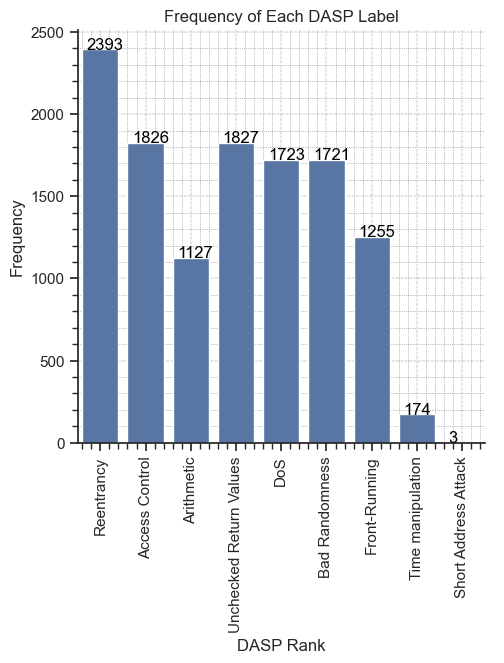

In [216]:
sns.set(style='ticks')
#create grouped bar chart

g=sns.catplot(x='DASP Rank', y='Frequency', data=pd.DataFrame(data=DASP_Labels_Statistic), kind='bar', height=5, aspect=1)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black', size='medium')
    
plt.title('Frequency of Each DASP Label', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")
   
plt.xticks(rotation = 90)
plt.minorticks_on()

# **Samples Selection**
---

## **Identify Solidity Version of Samples**
---

In [250]:
cgt_MultiDS_SolVersions = pd.DataFrame(columns=['fp_sol','Address','SolidityVersion'])
cgt_MultiDS_SolVersions['fp_sol'] = cgt_MultiDS['fp_sol']
cgt_MultiDS_SolVersions['Address'] = cgt_MultiDS['addr']
cgt_MultiDS_SolVersions

,fp_sol,Address,SolidityVersion
0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,NaN
1,e01ab8b006611d8612a81724edcfdc02,NaN,NaN
2,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,NaN
3,bdefad9ebc67e44422c1a6aa51f35735,NaN,NaN
4,acb72f1f3b2898b62d6d841f999e5c77,NaN,NaN
...,...,...,...
4101,NaN,0xfe9c69945687539fabbf531133838d9cce522a76,NaN
4102,ab0e2ea9e14512594f714bc485a94361,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,NaN
4103,d2c9f4ddb6dabb91742838a31da15421,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,NaN
4104,NaN,0xff821e51150dea3ca4d201d0df4e568dc9e03239,NaN


In [345]:
def checkSolVersion(filename):
    file = open(filename,"r")
    code = file.readlines()
    file.close()
    version = ""
    for line in range(0,len(code)):
        if 'pragma' in code[line]:
            data = code[line].rstrip().rsplit(";")
            solVersion = data[0].rsplit(" ")
            version = solVersion[len(solVersion)-1]
            flag = 0
            for i in range(0, len(version)):
                if version[i].isdigit():
                    version = version[i:]
                    break
                else:
                    flag += 1
                    if len(version) == flag:
                        version = None
                        break
            break
    return(version)

In [346]:
sourcCodeFiles_Path = './cgt/source/'
notFoundIDs = []
for filename in os.listdir(sourcCodeFiles_Path):
    FP_SOL = filename.rsplit('.')[0]
    version = checkSolVersion(sourcCodeFiles_Path + filename)
    if len(cgt_MultiDS_SolVersions.query("fp_sol == @FP_SOL"))>0:
        index = cgt_MultiDS_SolVersions.query("fp_sol == @FP_SOL").index[0]
        cgt_MultiDS_SolVersions.at[index,'SolidityVersion'] = version
    else:
        notFoundIDs.append(FP_SOL)
print('%d ids are not found:' %len(notFoundIDs))
print(notFoundIDs)

9 ids are not found:
['97fd68edc015e73703df3268aa848b9b', 'ce2c268994894ce68931a375392d738e', '8c192f05fb4a9973c70c1c46c5983c1b', '93fb5618bdca68a55cbd447bb48a77c0', 'afb5fb77476d43ecb7e40ccd46651b63', 'bd6e059f15ce84cf528c9f61ab7fc2c4', '271e07634bf0623fa2d82b14f0980b34', '8a051fd9de90b410e009445a486e1d10', 'd0361e2d039faf519251d3f574ad9d36']


In [354]:
print('Solidity version of each contract: ')
cgt_MultiDS_SolVersions

Solidity version of each contract: 


,fp_sol,Address,SolidityVersion
0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0.4.16
1,e01ab8b006611d8612a81724edcfdc02,NaN,0.5.1
2,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,0.4.14
3,bdefad9ebc67e44422c1a6aa51f35735,NaN,0.4.24
4,acb72f1f3b2898b62d6d841f999e5c77,NaN,0.5.11
...,...,...,...
4101,NaN,0xfe9c69945687539fabbf531133838d9cce522a76,NaN
4102,ab0e2ea9e14512594f714bc485a94361,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,NaN
4103,d2c9f4ddb6dabb91742838a31da15421,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,NaN
4104,NaN,0xff821e51150dea3ca4d201d0df4e568dc9e03239,NaN


## **Frequency of SC Versions**
---

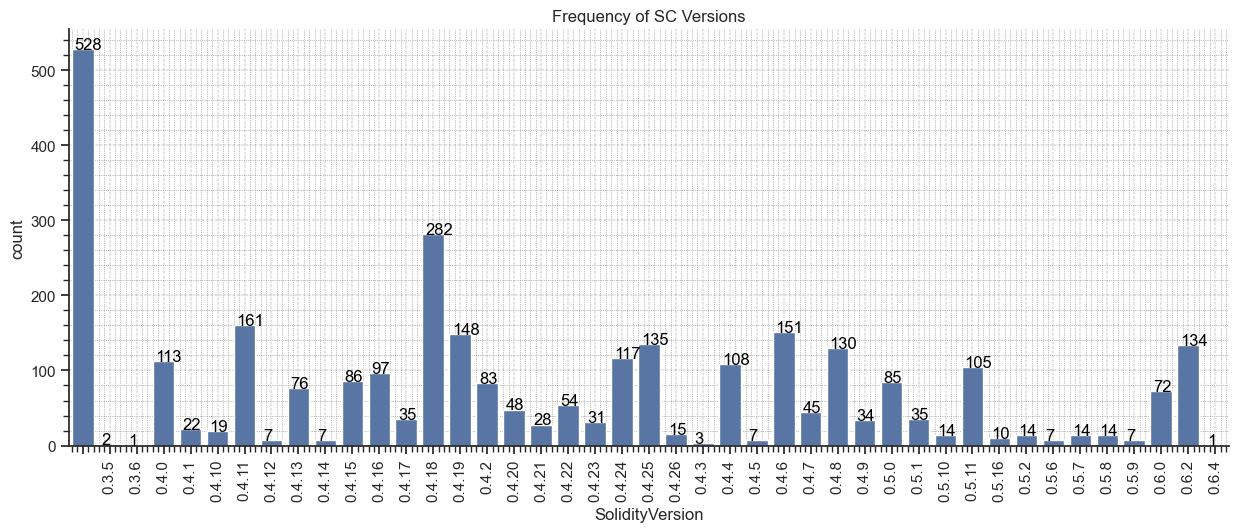

In [355]:
sns.set(style='ticks')
g=sns.catplot(x='SolidityVersion', y='count', data=pd.DataFrame(data=cgt_MultiDS_SolVersions['SolidityVersion'].value_counts().sort_index()), kind='bar', height=5, aspect=2.5)

plt.title('Frequency of SC Versions', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black',  size='medium')
    
plt.xticks(rotation = 90)
plt.minorticks_on()

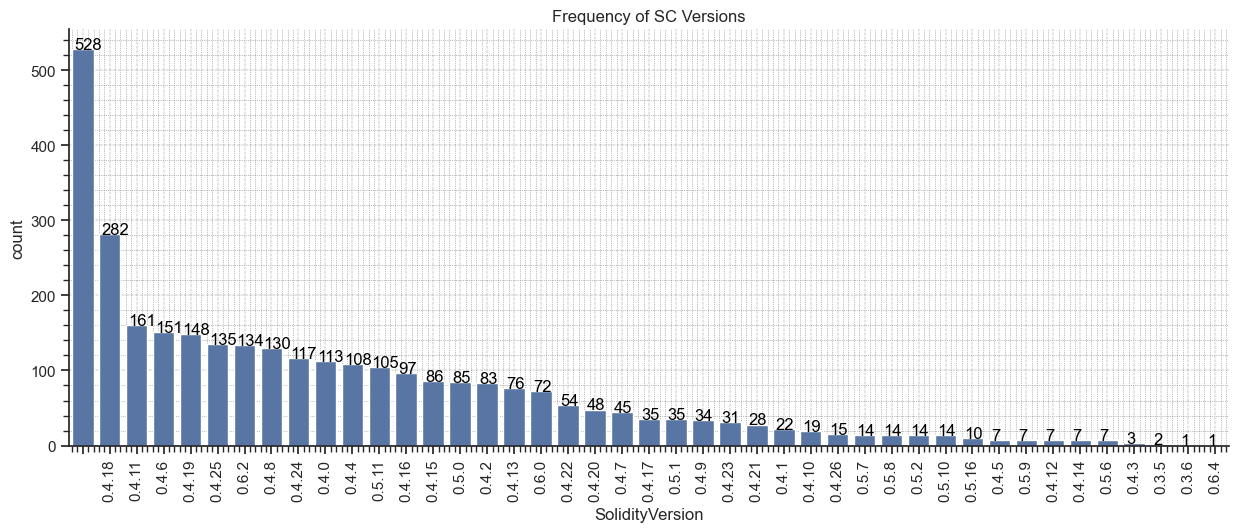

In [356]:
sns.set(style='ticks')
g=sns.catplot(x='SolidityVersion', y='count', data=pd.DataFrame(data=cgt_MultiDS_SolVersions['SolidityVersion'].value_counts()), kind='bar', height=5, aspect=2.5)

plt.title('Frequency of SC Versions', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black',  size='medium')
    
plt.xticks(rotation = 90)
plt.minorticks_on()

## **Determine the Study Sample Set**
*   **To be selected, the following conditions must be met:**
    *   Solidity version is declared, i.e. version value is not None.
    *   The solidity version is supported by current analysis tools.
        *   solc supports version 0.4.0 and above.
---

### **Remove not useful samples**
---

In [380]:
cgt_MultiDS_StudySet = cgt_MultiDS_SolVersions

In [381]:
#Remove samples with None Solidity version
cgt_MultiDS_StudySet['SolidityVersion'].replace('', np.nan, inplace=True)
cgt_MultiDS_StudySet.dropna(subset=["SolidityVersion"], inplace=True)
cgt_MultiDS_StudySet

,fp_sol,Address,SolidityVersion
0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0.4.16
1,e01ab8b006611d8612a81724edcfdc02,NaN,0.5.1
2,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,0.4.14
3,bdefad9ebc67e44422c1a6aa51f35735,NaN,0.4.24
4,acb72f1f3b2898b62d6d841f999e5c77,NaN,0.5.11
...,...,...,...
3422,17d819d205be082067eab3cdf21a1269,0xc98c6afec677606c24173137f2abc0e33ee7e067,0.4.2
3431,4f9b5b5d60768a1736cf6cf25d77a0e6,0xcb4038c6aff8c1c7b8ac5ddcdb11960f7ee9352f,0.4.6
3432,a59f8a1c156d3208c10523b405773f2a,0xe47014f16c55ddd3add5b68b951e10fcea7da686,0.4.2
3442,2596839d2345f66c2722d4cfed4eec5e,0xf504f3d488c7bb20a424943a6fc4ea2badcb9a18,0.4.6


In [382]:
#Remove samples that use unsupported Solidity compiler versions
toBeDroped = []
for index, row in cgt_MultiDS_StudySet.iterrows():
    if int(row['SolidityVersion'][2]) < 4:
        toBeDroped.append(index)
cgt_MultiDS_StudySet=cgt_MultiDS_StudySet.drop(index= toBeDroped)
cgt_MultiDS_StudySet

,fp_sol,Address,SolidityVersion
0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0.4.16
1,e01ab8b006611d8612a81724edcfdc02,NaN,0.5.1
2,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,0.4.14
3,bdefad9ebc67e44422c1a6aa51f35735,NaN,0.4.24
4,acb72f1f3b2898b62d6d841f999e5c77,NaN,0.5.11
...,...,...,...
3422,17d819d205be082067eab3cdf21a1269,0xc98c6afec677606c24173137f2abc0e33ee7e067,0.4.2
3431,4f9b5b5d60768a1736cf6cf25d77a0e6,0xcb4038c6aff8c1c7b8ac5ddcdb11960f7ee9352f,0.4.6
3432,a59f8a1c156d3208c10523b405773f2a,0xe47014f16c55ddd3add5b68b951e10fcea7da686,0.4.2
3442,2596839d2345f66c2722d4cfed4eec5e,0xf504f3d488c7bb20a424943a6fc4ea2badcb9a18,0.4.6


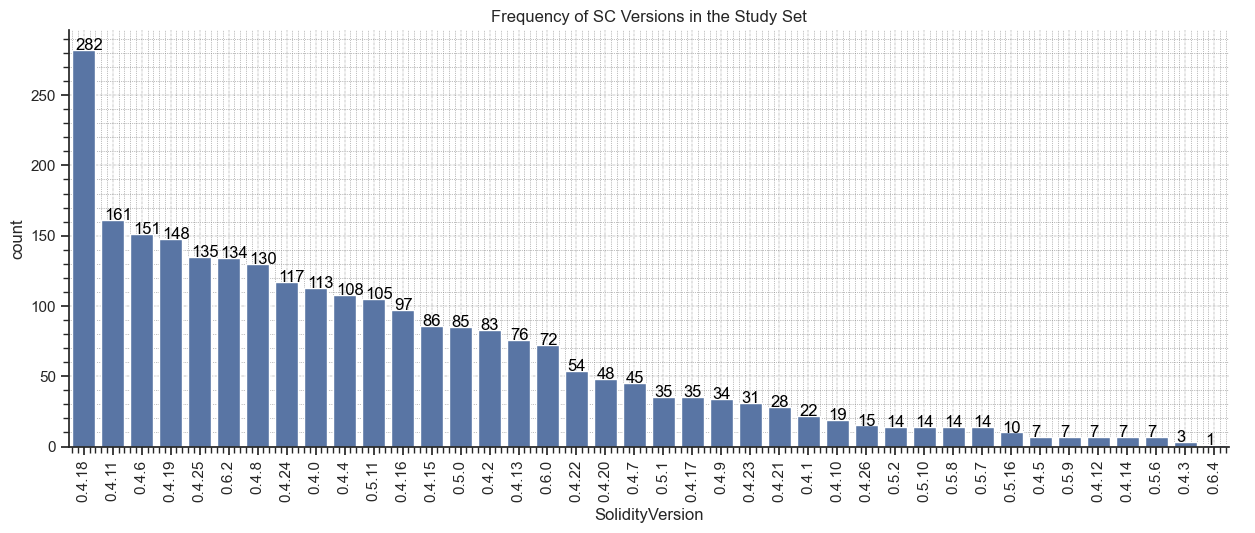

In [383]:
sns.set(style='ticks')
g=sns.catplot(x='SolidityVersion', y='count', data=pd.DataFrame(data=cgt_MultiDS_StudySet['SolidityVersion'].value_counts()), kind='bar', height=5, aspect=2.5)

plt.title('Frequency of SC Versions in the Study Set', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black',  size='medium')
    
plt.xticks(rotation = 90)
plt.minorticks_on()

### **Extract Source Code Files & Versions**
---

In [385]:
import shutil
files = cgt_MultiDS_StudySet['fp_sol']

for file in files:
    shutil.copy2('./cgt/source/'+file+'.sol', './Study_SamplesSet/'+file+'.sol')

In [409]:
cgt_MultiDS_StudySet = cgt_MultiDS_StudySet.reset_index(drop=True)
cgt_MultiDS_StudySet

,fp_sol,Address,SolidityVersion
0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0.4.16
1,e01ab8b006611d8612a81724edcfdc02,NaN,0.5.1
2,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,0.4.14
3,bdefad9ebc67e44422c1a6aa51f35735,NaN,0.4.24
4,acb72f1f3b2898b62d6d841f999e5c77,NaN,0.5.11
...,...,...,...
2549,17d819d205be082067eab3cdf21a1269,0xc98c6afec677606c24173137f2abc0e33ee7e067,0.4.2
2550,4f9b5b5d60768a1736cf6cf25d77a0e6,0xcb4038c6aff8c1c7b8ac5ddcdb11960f7ee9352f,0.4.6
2551,a59f8a1c156d3208c10523b405773f2a,0xe47014f16c55ddd3add5b68b951e10fcea7da686,0.4.2
2552,2596839d2345f66c2722d4cfed4eec5e,0xf504f3d488c7bb20a424943a6fc4ea2badcb9a18,0.4.6


In [410]:
samplesInfo = open('./Study_SamplesSet/SamplesInfo.txt','w')
for index, row in cgt_MultiDS_StudySet.iterrows():
    line = row['fp_sol'] + '.sol: ' + row['SolidityVersion']
    samplesInfo.write(line)
    if index < len(cgt_MultiDS_StudySet) - 1:
        samplesInfo.write('\n')
samplesInfo.close()